In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from qutip import *

## Introduction

( todo )

Let us consider a one-dimensional model of electrons hopping between atoms, where distance between atoms is labeled as $a$, and $n$'th orbital of any atom is $\left|n\right>$ for $n = 1 \dots N$.

Let us assume those orbitals are orthonormal ($\left<n|m\right> = \delta_{n,m}$) and also let us acknowledge the presence of an onsite energy $\epsilon$ on each atomic site of this one-dimensional chain of atoms and a hopping matrix element $-t$ representing a tendency of neighboring orbitals to overlap.

It can all be summarized to 

\begin{equation}
  \left<n\left|H\right|m\right> =
  \begin{cases}
    \epsilon, & \text{if}\ n=m \\
    -t, & \text{else if}\ n=m \pm 1 \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

We are going to find the dispersion relation of this system which is equivalent of finding it's eigenenergies. This will reproduce a Figure 11.2 from <cite data-cite="6842018/Y842Q5I5"></cite> page 102.

### Theoretical solution

Generalize a trial wavefunction $\left| \psi \right>$ to an arbitrary number of levels $N$.

\begin{align}
\left| \psi \right> = c_1 \left|1\right> + c_2 \left|2\right> &\rightarrow \left| \psi \right> = \sum_j^N c_j \left|j\right>
\end{align}

And we have

\begin{align}
\left<i\left|H\right|j\right> &= \epsilon \delta_{i,j} - t \delta_{i,j\pm1}
\end{align}

In $N=2$ case periodic boundary conditions were automatically satisfied, here we need to define them (like in LCAC)

\begin{align}
\left<1\left|H\right|N\right> &= \left<N\left|H\right|1\right>\\
&= -t
\end{align}

As in LCAC, let us approximate electrone to be "nearly free", thus as an intelligent guess for 1D Schrödinger equation let us fit it in a form of plane wave solution

$c_i = N^{-\frac{1}{2}}e^{-ikx}$ where $x$ is quantized into multiples of $a$, and since we impose periodic boundary conditions we need

\begin{align}
\left<1|\psi\right> &= \left<N|\psi\right>
\end{align}

So expanding it gives us

\begin{align}
N^{-\frac{1}{2}}e^{-ikx} &= N^{-\frac{1}{2}}e^{-ikx}
\end{align}

From both sides $N^{-\frac{1}{2}}$ simplifies, now pluggin in first and last level to $x$

\begin{align}
e^{-ikNa} &= e^{-ik0}
\end{align}

We get $1$ constant on the right hand side

\begin{align}
e^{-ikNa} &= 1
\end{align}

We can solve it for $k$ and we get

\begin{align}
k &= \frac{2\pi}{L}
\end{align}

We can now state $\left| \psi_n \right>$

\begin{align}
\left| \psi_n \right> &= N^{-\frac{1}{2}} \sum_l^N e^{-iklx} \left|l\right>
\end{align}

Now we need to find the eigenenergies by solving the time-independent Schrödinger equation $H \left|\psi\right> = E\left|\psi\right>$ for $E$. Predictible form of $H$ allows us to state it as follows.

\begin{align}
H \left| \psi \right> & = \sum_{l, l^\prime} H_{l, l^\prime} \left|\psi_{l^\prime}\right> \\
& = \sum_l N^{-\frac{1}{2}}(\epsilon e^{-ikla} - t e^{-ik(l-1)a} - t e^{-ik(l+1)a})\\
& = \sum_l N^{-\frac{1}{2}}(\epsilon - t e^{ika} - t e^{-ika}) e^{-ikla} \\
& = \sum_l N^{-\frac{1}{2}}(\epsilon - t e^{ika} - t e^{-ika}) \left| \psi_l \right> \\
& = \sum_l N^{-\frac{1}{2}}(\epsilon - 2t \cos(ka)) \left| \psi_l \right>
\end{align}

Where $N^{-\frac{1}{2}}$ represents the normalization and eigenenergies are $E(k) = \epsilon - 2t \cos(ka)$, and it allows us to visualize the dispersion curve for electrons. Let us start by defining input parameters.

In [4]:
# spacing between orbitals
a = 2

# number of orbitals to consider
N = 23

# distance to the last orbital
L = N*a

# onsite energy
eps = 0.25

# hopping matrix element
t = 0.5

Now we calculate numerically the dispersion curve according to derived earlier eigenenergy expression.

In [5]:
k = np.linspace(-L, L, 2*L)
exact = eps - 2.*t*np.cos(np.pi*k/L)

Let us visualize the dispersion curve using `matplotlib`.

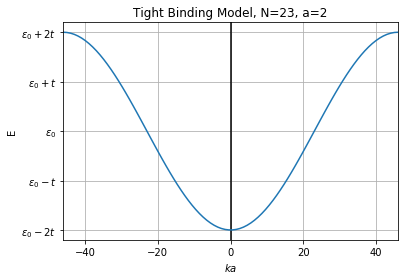

In [6]:
fig, axs = plt.subplots()
axs.set_xlim(-L, L)
axs.set_title('Tight Binding Model, N='+str(N)+', a='+str(a))
axs.set_ylabel('E')
axs.set_xlabel('$ka$')
axs.axvline(x=0., color='k')
axs.plot(k, exact, label='$E(k) = \epsilon_0 - 2 t cos(2 \pi \\frac{k}{N})$')
axs.set_yticks([eps-2.*t, eps-t, eps, eps+t, eps+2.*t])
axs.set_yticklabels(['$\epsilon_0-2t$', '$\epsilon_0-t$', '$\epsilon_0$', '$\epsilon_0+t$', '$\epsilon_0+2t$'])
axs.grid(True)

And as we can see, plotted figure perfectly reproduces Figure 11.2 from <cite data-cite="6842018/Y842Q5I5"></cite> page 102.

### Numerical solution

Once we have the theoretical solution plotted, we can solve this system numerically using QuTip and compare them. This consists of defining the Hamiltonian and numerically diagonalizing it. The advantage of using QuTip for it is that it provides us with convenient way of using operators and tensor products which makes it easy to define the Hamiltonian operator.

In [7]:
def _ket(n, N) : return basis(N, n)
def _bra(n, N) : return basis(N, n).dag()

# construct the Hamiltonian
H  = sum([eps*_ket(n, L)*_bra(n, L) for n in range(0, L)])
H -= sum([t*_ket(n, L)*_bra(n + 1, L) for n in range(0, L - 1)])
H -= sum([t*_ket(n, L)*_bra(n - 1, L) for n in range(1, L)])

# solve it numerically
evals, ekets = H.eigenstates()

# mirror it by the y-axis to make it appear on both sides of the curve
numerical = np.concatenate((np.flip(evals, 0), evals), axis=0)

let us plot both theoretical and numerical solutions. For theoretical we are going to use same data as in previous plot, while for numerical we will use numerically calculated eigenenergies and we will plot them as red dots.

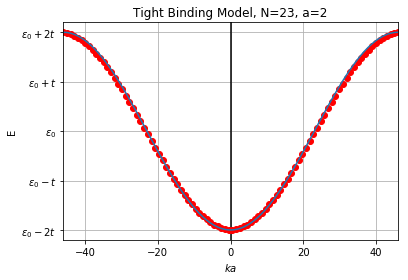

In [8]:
fig, axs = plt.subplots()
axs.set_xlim(-L, L)
axs.set_title('Tight Binding Model, N='+str(N)+', a='+str(a))
axs.set_ylabel('E')
axs.set_xlabel('$ka$')
axs.axvline(x=0., color='k')
axs.plot(k, numerical, 'ro', label='Eigenvalues of H')
axs.plot(k, exact, label='$E(k) = \epsilon_0 - 2 t cos(2 \pi \\frac{k}{N})$')
axs.set_yticks([eps-2.*t, eps-t, eps, eps+t, eps+2.*t])
axs.set_yticklabels(['$\epsilon_0-2t$', '$\epsilon_0-t$', '$\epsilon_0$', '$\epsilon_0+t$', '$\epsilon_0+2t$'])
axs.grid(True)

The numerical solution matches theoretical solution closely.

## References

<div class="cite2c-biblio"></div>